In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

In [95]:
df = pd.read_csv('data/experiment2.csv')
df.columns = ["t", "B", "V"]

In [96]:
df = df[700:1400]
df

,t,B,V
700,7.01,131.319962,0.069291
701,7.02,99.889984,0.063846
702,7.03,70.459694,0.058819
703,7.04,44.207928,0.054177
704,7.05,19.977577,0.049779
...,...,...,...
1395,13.96,-16.378143,0.046174
1396,13.97,-35.683670,0.043309
1397,13.98,-53.651627,0.040656
1398,13.99,-70.610008,0.038315


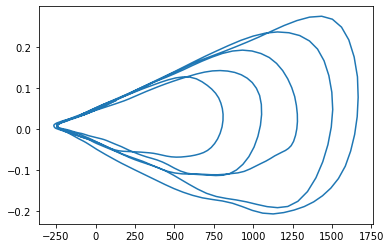

In [97]:
plt.plot(df['B'], df['V'])

In [98]:
x = df['t'].to_numpy()
y = df['B'].to_numpy()

dBdt = [(y[i+1]-y[i-1])/(x[i+1]-x[i-1]) for i in range(1,len(y)-1)]     # central differences for most of the points 
dBdt = np.insert(dBdt,0,y[1]-y[0])/(x[1]-x[0])         # forward difference for first point 
dBdt = np.append(dBdt,y[-1]-y[-2])/(x[-1]-x[-2])    # backward difference for last point

Text(0, 0.5, 'EMF (mV)')

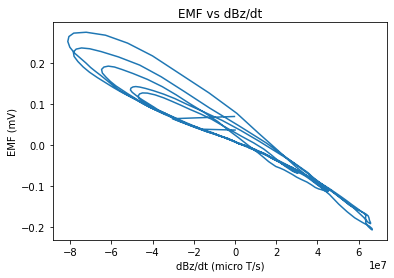

In [99]:
plt.plot(dBdt, df['V'])
plt.title("EMF vs dBz/dt")
plt.xlabel("dBz/dt (micro T/s)")
plt.ylabel("EMF (mV)")

In [100]:
def func_to_fit(dBdt, m):
    return m * dBdt

params, cov = curve_fit(func_to_fit, dBdt, df['V'])
std_errs = np.sqrt(np.diag(cov))
print("params" + str(params))
print("std_errs" + str(std_errs))

params[-2.65711338e-09]
std_errs[2.38554223e-11]


In [101]:
# lr = LinearRegression(fit_intercept=False)
# lr.fit(dBdt.reshape(-1, 1), df['V'].to_numpy().reshape(-1, 1))
# print("coef = " + str(lr.coef_[0][0]))

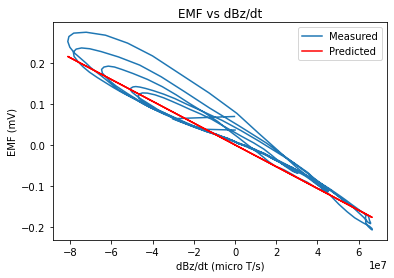

coef = -2.657113375754678e-09


In [102]:
ypred = func_to_fit(dBdt.reshape(-1, 1), params[0])
plt.plot(dBdt, df['V'], label="Measured")
plt.plot(dBdt, ypred, label="Predicted", color="r")
plt.title("EMF vs dBz/dt")
plt.xlabel("dBz/dt (micro T/s)")
plt.ylabel("EMF (mV)")
plt.legend()
plt.show()
print("coef = " + str(params[0]))

In [108]:
N = 32
a = np.pi * (.21/2)**2
N * a * -1

-1.108353888186479

In [107]:
params[0] * 10e6

-0.02657113375754678

In [109]:
np.abs(params[0] * 10e6 - N * a * -1) <= np.sqrt(.32**2)

False